In [49]:
import yfinance as yf
import numpy as np
import pandas as pd
from random import sample

sp500_tickers = [e.replace('.','-') for e in list(pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0].Symbol)]
#sp500_tickers = sample(sp500_tickers, 25)
df = yf.download(sp500_tickers, start='2010-01-01', end='2023-03-31')['Adj Close']
df = df.pct_change()

backup_df = df.copy()

[*********************100%***********************]  503 of 503 completed


In [50]:
df['verdes'] = df.apply(lambda row: (row > 0).sum(), axis=1)/df.apply(lambda row: row.notnull().sum(), axis=1)
df['promedio_dia_siguiente'] = df.apply(lambda row: row.mean(), axis=1).shift(-1)

In [60]:
df[df.verdes > 0.9]['promedio_dia_siguiente'].mean()

-0.0003926961855635507

In [63]:
df[df.verdes < 0.05]['promedio_dia_siguiente'].mean()

0.004418116002345125

<AxesSubplot:>

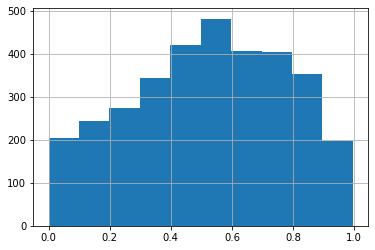

In [46]:
df.verdes.hist()

In [48]:
np.sort(df[df.verdes > 0.1].index)

array(['2010-01-05T00:00:00.000000000', '2010-01-06T00:00:00.000000000',
       '2010-01-07T00:00:00.000000000', ...,
       '2023-03-28T00:00:00.000000000', '2023-03-29T00:00:00.000000000',
       '2023-03-30T00:00:00.000000000'], dtype='datetime64[ns]')